# Eigenvalue Problems, Sparse Matrices, and Nonlinear Equations

In [3]:
import numpy as np
import scipy
import math

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Egenvalue problems

Besides solving linear systems, another major component of linear algebra is the eigenvalue problem.

The eigenvalue problem for a matrix $A$ is:

$\displaystyle A x_k = \lambda_k x_k$

where $\lambda_k$ is the $k$th eigenvalue and $x_k$ is its corresponding eigenvector. 

For simple 2-by-2 or 3-by-3 systems, eigenvalues can be solved symbolically.

In [4]:
import sympy
# Consider the node of the string vibration 

In [5]:
eps, delta = sympy.symbols("epsilon, delta")

In [6]:
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

Matrix([
[epsilon,    delta],
[  delta, -epsilon]])

In [7]:
H.eigenvals()

{-sqrt(delta**2 + epsilon**2): 1, sqrt(delta**2 + epsilon**2): 1}

In [8]:
H.eigenvects()

[(-sqrt(delta**2 + epsilon**2),
  1,
  [Matrix([
   [epsilon/delta - sqrt(delta**2 + epsilon**2)/delta],
   [                                                1]])]),
 (sqrt(delta**2 + epsilon**2),
  1,
  [Matrix([
   [epsilon/delta + sqrt(delta**2 + epsilon**2)/delta],
   [                                                1]])])]

The numerical solution of eigenvalue problems is supported as part of `scipy.linalg`. 

The computational complexity is $O(n^3)$ for $n$ the size of the (square) matrix.

In [9]:
import scipy.linalg as la

# or equivalently:
# from scipy import linalg as la

To calculate eigenvalues of a matrix, use the function `eigvals`:

In [10]:
A = np.random.rand(3,3)

In [11]:
evals = la.eigvals(A)
evals

array([ 1.19260519+0.j,  0.68781859+0.j, -0.29972032+0.j])

In [12]:
B = A + A.T
evals = la.eigvals(B)
evals

array([ 2.48537105+0.j,  1.37560997+0.j, -0.6995741 +0.j])

Note that the eigenvalues of a real matrix may be complex numbers.

For calculating both eigenvalues and eigenvectors, use the function `eig`:

In [13]:
evals, evecs = la.eig(A)

In [14]:
evals

array([ 1.19260519+0.j,  0.68781859+0.j, -0.29972032+0.j])

In [15]:
evecs

array([[ 0.70142368,  0.96994224, -0.37602898],
       [ 0.57379652, -0.17193259, -0.55114305],
       [ 0.42280299, -0.17219532,  0.74487821]])

The eigenvectors corresponding to the $k$th eigenvalue (stored in `evals[k]`) is the $k$th *column* in `evecs`, i.e., `evecs[:,k]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [16]:
k = 1

la.norm(np.dot(A, evecs[:,k]) - evals[k] * evecs[:,k])

3.1217311733394683e-16

There are also more specialized eigensolvers, like the `eigh` for Hermitian (the complex equivalent to symmetric) matrices. 

In [17]:
B = A + A.T
evals, evecs = la.eigh(B)

In [18]:
evals

array([-0.6995741 ,  1.37560997,  2.48537105])

In [19]:
evecs

array([[-0.17935203,  0.83946938, -0.51295615],
       [-0.57947384, -0.51150549, -0.63448579],
       [ 0.79501127, -0.18344835, -0.57819009]])

In [20]:
C = np.dot(A, A.T)
evals, evecs = la.eigh(C)


In [21]:
evals

array([0.06197874, 0.59611815, 1.63605728])

In [22]:
evecs

array([[ 0.22415828,  0.73859852, -0.63578714],
       [-0.66727882, -0.35915409, -0.65249315],
       [ 0.71027603, -0.57050904, -0.41234379]])

### An Example Application: Vibrating Spring

https://en.wikipedia.org/wiki/String_vibration

A string under tension (think of a violin string) vibrates at a natural lowest or fundamental frequency  with harmonics that are integer multiples of the fundamental frequency --- i.e., only certain frequencies (or mixtures thereof) are permitted. 

Imagine a string of length $L$ stretched along the x-axis (attached at $x=0$ and $x=L$) and vibrating up/down in the y direction.  For small amplitude motions, the equation that describes the vibrational modes is

$$
   - \frac{T}{\rho}  \frac{d^2 y}{d x^2} = \omega^2 y
$$
where $y(x)$ is the displacement, $\rho$ the linear mass density of the string (mass per unit length), and $T$ the tension.  The vibrational frequencies can be computed to be

$$
  \omega_i = (i+1) \frac{\pi}{L} \sqrt{\frac{T}{\rho}}
$$


We don't need to dwell on the details of the diffential equation, but instead immediately imagine chopping the string up into $n$ small elements and approximating the motion of each element (technically using a finite-difference approximation).  This yields the matrix equation
$$
- \frac{T}{\rho h^2}
\left[\begin{array}{cccccc}
-2     &   1    &       &      &      &   \\
 1     &  -2    &   1   &     &     &   \\
       &   1    &  -2   &  1   &    &  \\
       &        & \ddots&\ddots&\ddots&   \\
       &        &  &  1   &  -2   &   1    \\
       &        &  &     &   1   &  -2   \\
\end{array}\right]
\left[\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_{n-1} \\
y_n
\end{array}\right]
=
\omega^2
\left[\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_{n-1} \\
y_n
\end{array}\right]
$$
which we can see is an eigenvalue problem with $\omega^2$ as the eigenvalues, i.e.,
$$
 A y = \lambda y
$$
with $\omega = \sqrt{\lambda}$.

Below we solve this this problem by
* Defining the problem parameters
* Constructing the matrix
* Solving the eigenvalue problem
* Printing out the frequencies
* Plotting the 

 i   freq[i]   (i+1)*freq[0]    formula
--   -------   -------------    --------
 0    0.157       0.157           0.157
 1    0.314       0.314           0.314
 2    0.470       0.471           0.471
 3    0.626       0.628           0.628
 4    0.781       0.785           0.785


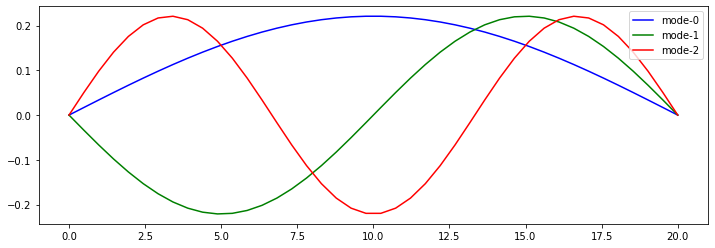

In [23]:
# Define the parameters
L = 20  # length of the string
rho = 1 # density of the string
T = 1   # tension of the string

n = 40  # number of elements
h = L/(n+1) # size of each element
x = np.linspace(0,L,n+2)

# Set up the matrix
A = np.zeros((n,n))
A.fill(0)
for i in range(n):
    A[i,i] = -2.0
for i in range(n-1):
    A[i,i+1] = 1.0
    A[i+1,i] = 1.0
A *= -T/rho/h**2

# Compute the eigenvalues and vectors
evals, evecs = la.eigh(A)

# Sort the eigenvalues/vectors into ascending order
idx = evals.argsort()
evals = evals[idx]
evecs = evecs[:,idx]

# Print out the first few frequencies and compare with the expected multiple
# of the fundamental (lowest) frequency and analytic formula
print(" i   freq[i]   (i+1)*freq[0]    formula")
print("--   -------   -------------    --------")
for i in range(5):
    freq = (i+1)*math.sqrt(T/rho)*math.pi/L
    print("%2d    %.3f       %.3f           %.3f" % (i, math.sqrt(evals[i]), (i+1)*math.sqrt(evals[0]), freq))

# For plotting it looks better if we pad with zeros at the fixed end points at x=0 and x=L
evecs_padded = np.zeros((n+2,n))
evecs_padded[1:-1,:] = evecs

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x,evecs_padded[:,0],"-b",label="mode-0")
ax.plot(x,evecs_padded[:,1],"-g",label="mode-1")
ax.plot(x,evecs_padded[:,2],"-r",label="mode-2")
ax.legend(loc=1);


#1.571e-01 100
#1.571e-01 200

### Another Example Application: Markov Chain

A small child, is either sleeping, eating ice cream, or running.  Every 5 minutes it randomly decides what to do next depending on what it is doing at that moment.  

**Question:** If we watch the child over a long time, what is the probability that the child is sleeping, running, or eating ice cream?

The child is an example of what is called a finite-state machine --- there's a fixed number of states (in this case just 3) and a simple set of rules to transition between states.

It is also an example of a [Markov chain](https://en.wikipedia.org/wiki/Markov_chain) which is a probabalistic process in which the transition probabilities only depend upon the current state.  This is a very important tool in many fields (e.g., modern AI, sociology, chemistry, physics, biology, finance, etc.).

To compute an answer we need to assign some probabilities. For instance, if the child is running let there be a probability of 
* 0.1 that it will sleep
* 0.6 that it will keep running
* 0.3 that it will eat ice cream

This information can be depicted graphically

<img src="https://drive.google.com/uc?export=download&id=10_ch3KlSQe8weVXj4llprVT8qF-yCWwm" width="300">

or encoded in a *transition matrix* $P$, for which the sum of each column is 1 (to conserve probability). For example,

In [24]:
states = ["Sleep","Run","Icecream"]
print("The states are:")
for pair in enumerate(states):
    print("  ", pair)

print("\nThe meaning of the transition matrix elements:")
# Possible sequences of events
transitionName = [["S<--S","S<--R","S<--I"],["R<--S","R<--R","R<--I"],["I<--S","I<--R","I<--I"]]
print(transitionName)

print("\nThe transition matrix")
P = np.array([[0.2,0.1,0.2],[0.6,0.6,0.7],[0.2,0.3,0.1]])
print(P)

The states are:
   (0, 'Sleep')
   (1, 'Run')
   (2, 'Icecream')

The meaning of the transition matrix elements:
[['S<--S', 'S<--R', 'S<--I'], ['R<--S', 'R<--R', 'R<--I'], ['I<--S', 'I<--R', 'I<--I']]

The transition matrix
[[0.2 0.1 0.2]
 [0.6 0.6 0.7]
 [0.2 0.3 0.1]]


We will look at 3 different ways to compute the answer.

*Approach 1:* Simulation of the dynamical process.  Start the child in some state, and according to the probabilities given in the transition matrix randomly select a new state.  Repeat many times and compute statistics.  

For very big Markov chains this can be the only viable approach, but for this small problem it is actually the slowest and also least accurate (due to statistical noise).

In [25]:
import random
CP = np.cumsum(P,0) # cumulative probabilities to assist in sampling random moves

count = np.zeros(3) # accumulate count of each state
s = 0  # initial state
Nmove = 100000
for move in range(Nmove):
    count[s] += 1           # accumulate statistics
    p = random.random()     # random number in [0,1]
    for snew in range(3):   # pick new state using cumulative probability
        if CP[snew,s]>p:
            s = snew
            break

count = count/Nmove
for i in range(len(count)):
    print(states[i], count[i])

Sleep 0.13799
Run 0.62302
Icecream 0.23899


*Approach 2:* Repeated application of the transition matrix.

With the above choice for the numbering of the states, the initial state that the child is running is captured in the vector $s = \left[\begin{array}\\0\\1\\0\end{array}\right]$.  

So the child's next state is described by the vector of probabilities $P s = \left[\begin{array}\\0.1\\0.6\\0.3\end{array}\right]$.

And we can keep repeating this process (multiplying by $P$) to obtain the subsequent probabilities until we reach the steady state.

In [26]:
s = np.array([0,1,0]) # initial state is eating ice cream
for move in range(12):
    print("%2d"%move, s)
    s = np.dot(P,s)
print("")
for i in range(len(s)):
    print(states[i], s[i])

 0 [0 1 0]
 1 [0.1 0.6 0.3]
 2 [0.14 0.63 0.23]
 3 [0.137 0.623 0.24 ]
 4 [0.1377 0.624  0.2383]
 5 [0.1376  0.62383 0.23857]
 6 [0.137617 0.623857 0.238526]
 7 [0.1376143 0.6238526 0.2385331]
 8 [0.13761474 0.62385331 0.23853195]
 9 [0.13761467 0.62385319 0.23853214]
10 [0.13761468 0.62385321 0.23853211]
11 [0.13761468 0.62385321 0.23853211]

Sleep 0.137614678941
Run 0.6238532110769999
Icecream 0.23853210998199995


*Question:* Does it matter what state you start from?  Try starting from either running or sleeping states.

*Approach 3:* Compute the eigenvectors of the transition matrix.

We intuited above that the steady-state probabiity distribution could be obtained by repeatedly multiplying by the transition matrix ($P$).   Let $s$ be an eigen vector of $P$ with eigenvalue $\lambda$.  I.e.,
$$
P s = \lambda s
$$
If we apply $P$ $n$ times we will get
$$
P^n s = \lambda^n s
$$
But if $\lambda<1$, we will have $\lambda^n \rightarrow 0$ for large $n$.  Similarly, if $\lambda>1$, we will have $\lambda^n \rightarrow \infty$ for large $n$.  Therefore, if there is a well-defined steady state we must have one eigenvalue equal to one, and all others less than one.

So, we can find the steady state by computing the eigenvalues of the transition matrix and looking for the eigenvector corresponding to eigenvalue one.


In [27]:
evals, evecs = la.eig(P)

print("evals", np.real(evals))
print(evecs)

evals [ 1.         0.0618034 -0.1618034]
[[-0.20180184 -0.80901699 -0.30901699]
 [-0.914835    0.5        -0.5       ]
 [-0.34978985  0.30901699  0.80901699]]


The eigenvector corresponding to eigenvalue 1 is the steady state or *stationary probability distribution* after we normalize it so that the sum is 1.

In [28]:
v = evecs[:,0]
v = v / sum(v)
for i in range(len(v)):
    print(states[i], v[i])

Sleep 0.1376146788990824
Run 0.6238532110091745
Icecream 0.23853211009174316


### Sparse matrices

As we have already seen, algorithms operating on matrices can become very expensive very quickly due to the comptational complexity often scaling as $O(n^3)$.  The only way we can solve very large problems are if nearly all of the matrix elements are zero --- i.e., if the matrix is sparse.  It is routine to sove linear equations with literally billions of unknowns, as long as the matrix involved is sparse (meaning just circa $O(N)$ non-zero entries).

Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calculations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [ ]:
import numpy as np
import scipy.sparse as sp

In [ ]:
# dense matrix
M = np.array([[1.,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

In [ ]:
# convert from dense to sparse
A = sp.csr_matrix(M); 
print(A)
A

In [ ]:
# convert from sparse to dense
B = A.todense()
print(B)
B

More efficient way to create sparse matrices: create an empty matrix and populate it using matrix indexing. This avoids creating a potentially large dense matrix.

In [ ]:
A = sp.lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
print(A)
A

In [ ]:
A.todense()

Converting between different sparse matrix formats:

In [ ]:
print(A)
A

In [ ]:
A = sp.csr_matrix(A); 
print(A)
A

In [ ]:
A = sp.csc_matrix(A); A

We can compute with sparse matrices like with dense matrices:

In [ ]:
A.todense()

In [ ]:
(A * A).todense()

In [ ]:
A.dot(A).todense()

In [ ]:
v = np.array([1,2,3,4])[:,np.newaxis]

In [ ]:
# sparse matrix - dense vector multiplication
A * v

In [ ]:
# alternatively, one can use
v = np.array([1,2,3,4])
A.dot(v)

In [ ]:
# same result with dense matrix - dense vector multiplcation
np.dot(A.todense(),v)

When using sparse matrices, the linear algebra functionality is provided by `scipy.sparse.linalg`.

In [ ]:
import scipy.sparse.linalg as sla

Linear systems can be solved by using `spsolve` or some iterative methods (such as `gmres`).

In [ ]:
x = sla.spsolve(A, v); x

In [ ]:
x = la.solve(A.todense(), v); x

In [ ]:
x, info = sla.gmres(A, v); x

In [ ]:
info

Eigenvalue problems are solved by using `eigs` or `eigsh` (for Hermitian matrix). Typically, only a subset of eigenvalues and eigenvectors are computed.

In [ ]:
evals, evecs = sla.eigs(A, 2)

In [ ]:
evals

In [ ]:
evecs

## Nonlinear equations

We now consider the problem of finding the root for a function of the form $f(x) = 0$.

For simple problems, we can solve it algebraically/symbolically.

In [ ]:
import sympy

In [ ]:
x, a, b, c = sympy.symbols("x, a, b, c")

In [ ]:
a + b*x + c*x**2

In [ ]:
sympy.solve(a + b*x + c*x**2, x)

In [ ]:
sympy.roots(a + b*x + c*x**2, x)

In [ ]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

However, symbolic computation is very limited.

In [ ]:
try:
    sympy.solve(sympy.sin(x)-x, x)
except NotImplementedError as e:
    print(e)

For most problems of practical interests, we need to solve nonlinear equations numerically. This can be done using the `scipy.optimize.fsolve` function. It requires an initial guess: 

In [ ]:
import scipy.optimize as opt

In [ ]:
opt.fsolve(lambda x:np.sin(x)-x, 0.1)

In [ ]:
opt.fsolve?

Here is a more complicated example:

In [ ]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2*np.pi*omega) - omega_c/omega

In [ ]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(1.e-100, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

We may get different solutions from different starting values.

In [ ]:
opt.fsolve(f, 0.1)

In [ ]:
opt.fsolve(f, 0.6)

In [ ]:
opt.fsolve(f, 1.1)

The function `fsolve` also works for multivariate functions. 

In [ ]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

In [ ]:
opt.fsolve(f, np.array([1, 1]))

### Bisection method for univariate functions

For univariate functions, a simple (but inefficient and  method for solving nonlinear equations is the bisection method, as illustrated below.

We are seeking a solution to $f(x)=0$ and are told that the solution lies in the interval $[a,b]$. 
1. Evaluate the function at the end points ($a$ and $b$)
2. Evaluate the function at the mid-point ($m=(a+b)/2$).  
3. If the sign of $f(a)$ is the same as that of $f(m)$ it means the root is in the right half of the interval, so set $a=m$. Otherwise, the root must be in the left half, so set $b=m$.
4. Repeat steps 2 and 3 until $b-a$ is sufficiently small.

In [ ]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method in action")

# Newton's Method

A more sophisticated method is Newton's method, in which
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$
<img src="https://drive.google.com/uc?export=download&id=0ByTwsK5_Tl_PR21qYmZrN3d0bzg" width="300">

In [ ]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method in action")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()


Most practical methods are some variate of Newton's method or quasi-Newton methods, such as the secant method.

The secant method can be interpreted as using a finite difference approximation to estimate the derivative in Newton's method. Similar to the bisection method, the secant method uses two data points to determine a third one at each step. However, it uses not only the signs but also the values to draw a secant line through two points.
<img src="https://drive.google.com/uc?export=download&id=0ByTwsK5_Tl_Pc2gtOGtjNXYzY2s" width="400">

The slope of the scant is given by
$$s_k = \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}.$$
The intersection of the secant with the $x$ axis is then
$$x_{k+1} = x_k - \frac{f(x_k)}{s_k} = x_k + \frac{x_k-x_{k-1}}{f(x_{k-1}) / f(x_k) - 1}.$$

We will leave this as an exercise in the homework.

## Further reading

* Chapter 5 of Numerical Python book for eigenvalue problem and nonlinear equations
* Chapter 10 of Numerical Python book for sparse matrices
* For more on Markov chains, see e.g. 
https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial

## Acknowledgements

Adapted from J.R. Johansson's Scientific Python Lectures available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).